## Loading of Miller ECoG data of motor imagery

includes some visualizations

In [1]:
# @title Data retrieval
import os, requests

fname = 'motor_imagery.npz'
url = "https://osf.io/ksqv8/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [2]:
# @title Install packages (`nilearn`, `nimare`. `duecredit`), import `matplotlib` and set defaults
# install packages to visualize brains and electrode locations

from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
# @title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx.
dat1 = alldat[0][0]
dat2 = alldat[0][1]

print(dat1.keys())
print(dat2.keys())

dat1['t_on'], dat1['t_off']

dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])
dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


(array([ 10160,  16160,  22160,  28240,  34240,  40320,  46360,  52440,
         58520,  64600,  70680,  76680,  82680,  88720,  94760, 100760,
        106800, 112840, 118880, 124960, 131040, 137080, 143160, 149160,
        155160, 161160, 167240, 173320, 179320, 185320, 191320, 197400,
        203400, 209480, 215520, 221520, 227560, 233600, 239640, 245640,
        251640, 257720, 263760, 269800, 275840, 281840, 287880, 293880,
        299880, 305920, 311920, 318000, 324000, 330080, 336120, 342200,
        348240, 354320, 360360, 366440]),
 array([ 13160,  19160,  25160,  31240,  37240,  43320,  49360,  55440,
         61520,  67600,  73680,  79680,  85680,  91720,  97760, 103760,
        109800, 115840, 121880, 127960, 134040, 140080, 146160, 152160,
        158160, 164160, 170240, 176320, 182320, 188320, 194320, 200400,
        206400, 212480, 218520, 224520, 230560, 236600, 242640, 248640,
        254640, 260720, 266760, 272800, 278840, 284840, 290880, 296880,
        302880, 308920

# Dataset info #

This is one of multiple ECoG datasets from Miller 2019, recorded in a clinical settings with a variety of tasks. Raw data and dataset paper are here:

https://exhibits.stanford.edu/data/catalog/zk881ps0522
https://www.nature.com/articles/s41562-019-0678-3

This particular dataset was originally described in this paper:

- Miller, Kai J., Gerwin Schalk, Eberhard E. Fetz, Marcel Den Nijs, Jeffrey G. Ojemann, and Rajesh PN Rao. "Cortical activity during motor execution, motor imagery, and imagery-based online feedback." Proceedings of the National Academy of Sciences (2010): 200913697. doi: [10.1073/pnas.0913697107](https://doi.org/10.1073/pnas.0913697107)

<br>

`dat1` and `dat2` are data from the two blocks performed in each subject. The first one was the actual movements, the second one was motor imagery. For the movement task, from the original dataset instructions:

*Patients performed simple, repetitive, motor tasks of hand (synchronous flexion and extension of all fingers, i.e., clenching and releasing a fist at a self-paced rate of ~1-2 Hz) or tongue (opening of mouth with protrusion and retraction of the tongue, i.e., sticking the tongue in and out, also at ~1-2 Hz). These movements were performed in an interval-based manner, alternating between movement and rest, and the side of move- ment was always contralateral to the side of cortical grid placement.*

<br>

For the imagery task, from the original dataset instructions:

*Following the overt movement experiment, each subject performed an imagery task, imagining making identical movement rather than executing the movement. The imagery was kinesthetic rather than visual (“imagine yourself performing the actions like you just did”; i.e., “don’t imagine what it looked like, but imagine making the motions”).*

<br>

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across time and conversion to float16 to minimize size. Please convert back to float32 after loading the data in the notebook, to avoid unexpected behavior.

Both experiments:
* `dat['V']`: continuous voltage data (time by channels)
* `dat['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat['t_on']`: time of stimulus onset in data samples
* `dat['t_off']`: time of stimulus offset, always 400 samples after `t_on`
* `dat['stim_id`]: identity of stimulus (11 = tongue, 12 = hand), real or imaginary stimulus
* `dat['scale_uv']`: scale factor to multiply the data values to get to microvolts (uV).
* `dat['locs`]`: 3D electrode positions on the brain surface

In [4]:
from nilearn import plotting
from nimare import utils

plt.figure(figsize=(8, 8))
locs = dat1['locs']
view = plotting.view_markers(utils.tal2mni(locs),
                             marker_labels=['%d'%k for k in np.arange(locs.shape[0])],
                             marker_color='purple',
                             marker_size=5)
view

<Figure size 800x800 with 0 Axes>

In [5]:
from scipy import signal

def plot_PSD(V_tongue_concat, V_hand_concat, V_rest_concat, num_chs='None'):
  
  plt.figure(figsize=(20, 40))

  if idx_ch !=
  for idx_ch in range(num_chs):
  
    # Computing the pow spectrum
    window = np.hanning(len(V_tongue_concat[idx_ch,:]))
    PSD_tongue = np.abs(np.fft.fft(V_tongue_concat[idx_ch,:] * window)) ** 2
    PSD_hand = np.abs(np.fft.fft(V_hand_concat[idx_ch,:] * window)) ** 2
    PSD_rest = np.abs(np.fft.fft(V_rest_concat[idx_ch,:] * window)) ** 2
    freq = np.fft.fftfreq(len(V_tongue_concat[idx_ch,:]), 1 / dat1['srate'])

    # take the envelope
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    PSD_tongue_env = signal.filtfilt(b, a, PSD_tongue, 0)
    PSD_hand_env = signal.filtfilt(b, a, PSD_hand, 0)
    PSD_rest_env = signal.filtfilt(b, a, PSD_rest, 0)

    ax = plt.subplot(np.ceil(num_chs / 2).astype(int), 2, idx_ch+1)
    plt.plot(freq[0:int(len(PSD_tongue_env)/2)], PSD_tongue_env[0:int(len(PSD_tongue_env)/2)]  * freq[0:int(len(PSD_tongue_env)/2)], label = 'tongue')
    plt.plot(freq[0:int(len(PSD_hand_env)/2)], PSD_hand_env[0:int(len(PSD_hand_env)/2)]  * freq[0:int(len(PSD_hand_env)/2)], label = 'hand')
    plt.plot(freq[0:int(len(PSD_rest_env)/2)], PSD_rest_env[0:int(len(PSD_rest_env)/2)]  * freq[0:int(len(PSD_rest_env)/2)], label = 'rest')
    plt.title(f'ch{idx_ch}, {dat1["gyrus"][idx_ch]}, {dat1["Brodmann_Area"][idx_ch]}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')

    #  Set x-axis limits
    plt.xlim(0, 50)
    plt.legend()
  plt.show()


In [17]:
def split_dataset(dat):

    # Convert data to float32
    V = dat['V'].astype('float32')

    # Rescaling the voltage channels
    V_ = V * dat['scale_uv']

    nt, nchan = V_.shape
    nstim = len(dat['t_on'])
    trange = np.arange(0, 2000)
    ts_on = dat['t_on'][:, np.newaxis] + trange
    ts_off = dat['t_off'][:, np.newaxis] + trange[0:1000]

    V_epochs_on = np.reshape(V_[ts_on, :], (nstim, 2000, nchan))

    V_tongue = (V_epochs_on[dat['stim_id'] == 11])
    V_hand = (V_epochs_on[dat['stim_id'] == 12])
    V_rest = np.reshape(V_[ts_off, :], (nstim, 1000, nchan))
    
    return V_tongue, V_hand, V_rest


In [12]:
def concatenate_epochs(V_tongue, V_hand, V_rest):
     # Reshape the signals
    V_tongue_concat = np.zeros((V_tongue.shape[2], V_tongue.shape[0]*V_tongue.shape[1]))
    V_hand_concat = np.zeros((V_hand.shape[2], V_hand.shape[0]*V_hand.shape[1]))
    V_rest_concat = np.zeros((V_rest.shape[2], V_rest.shape[0]*V_rest.shape[1]))
    for ch in range(V_tongue.shape[2]):
        V_tongue_concat[ch] = np.reshape(V_tongue[:,:,ch], (1,-1))
        V_hand_concat[ch] = np.reshape(V_hand[:,:,ch], (1,-1))
        V_rest_concat[ch] = np.reshape(V_rest[:,:,ch], (1,-1))
    
    return V_tongue_concat, V_hand_concat, V_rest_concat

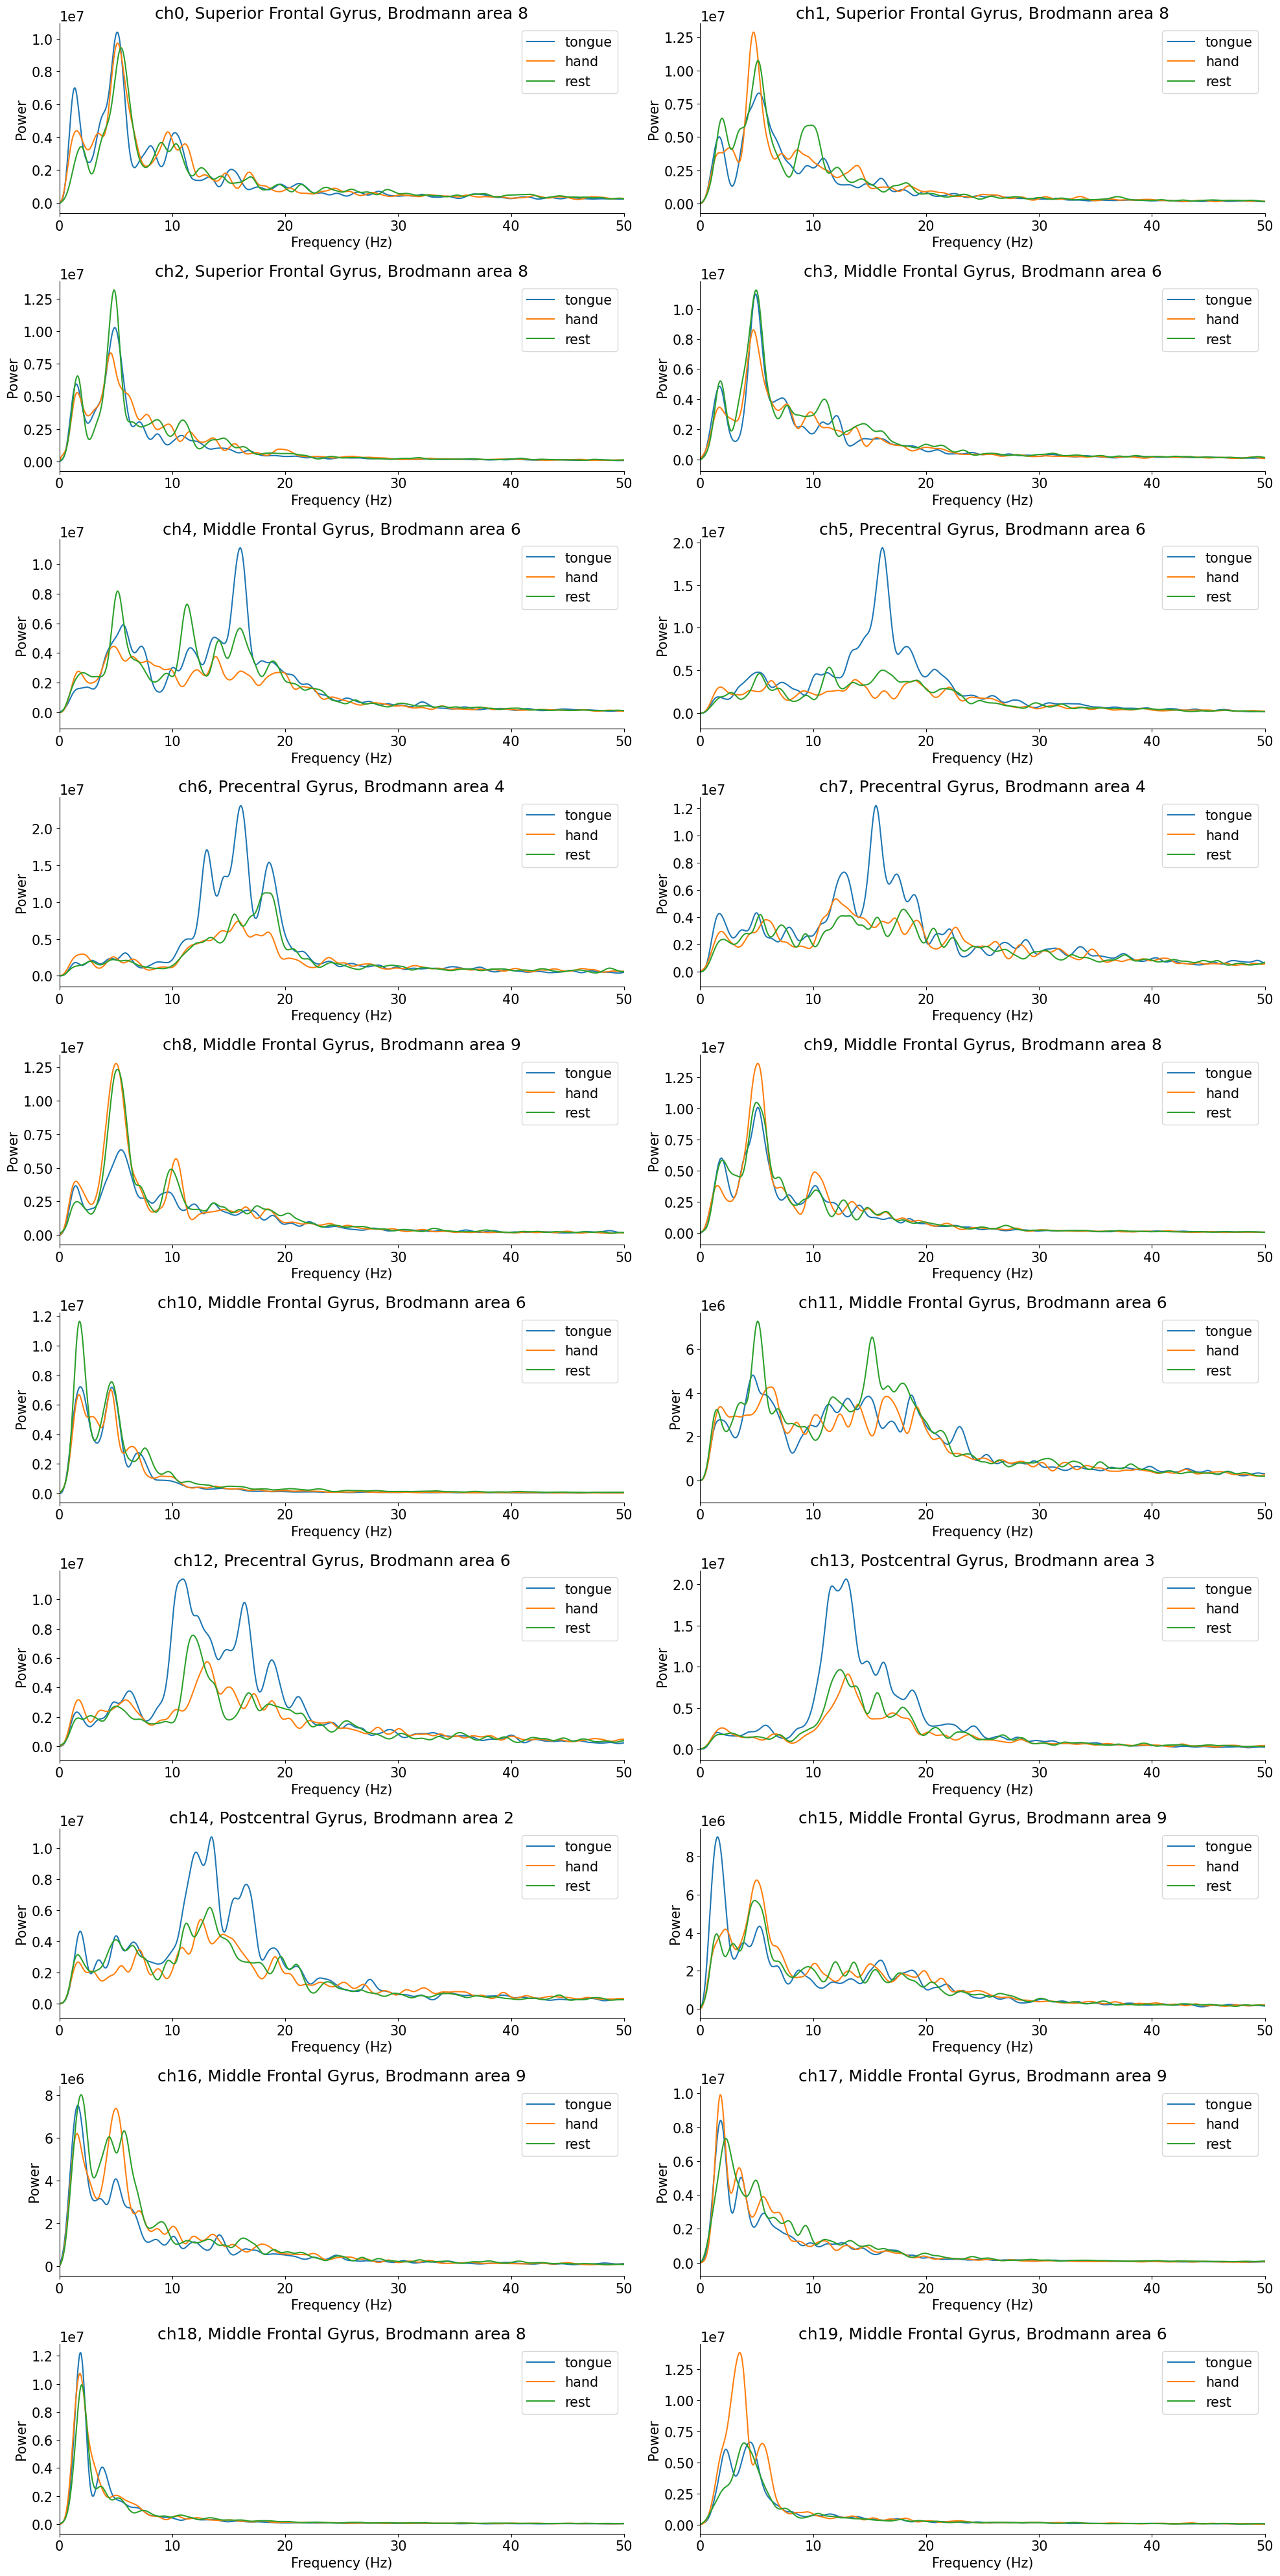

In [16]:
# Real Motor execution
V_tongue, V_hand, V_rest = split_dataset(dat1)

# Concatenate the epochs
V_tongue_concat, V_hand_concat, V_rest_concat = concatenate_epochs (V_tongue, V_hand, V_rest)

# How many trials do you want to visualize?
num_chs = 20

# Plot the PSD
plot_PSD(V_tongue_concat, V_hand_concat, V_rest_concat, num_chs)


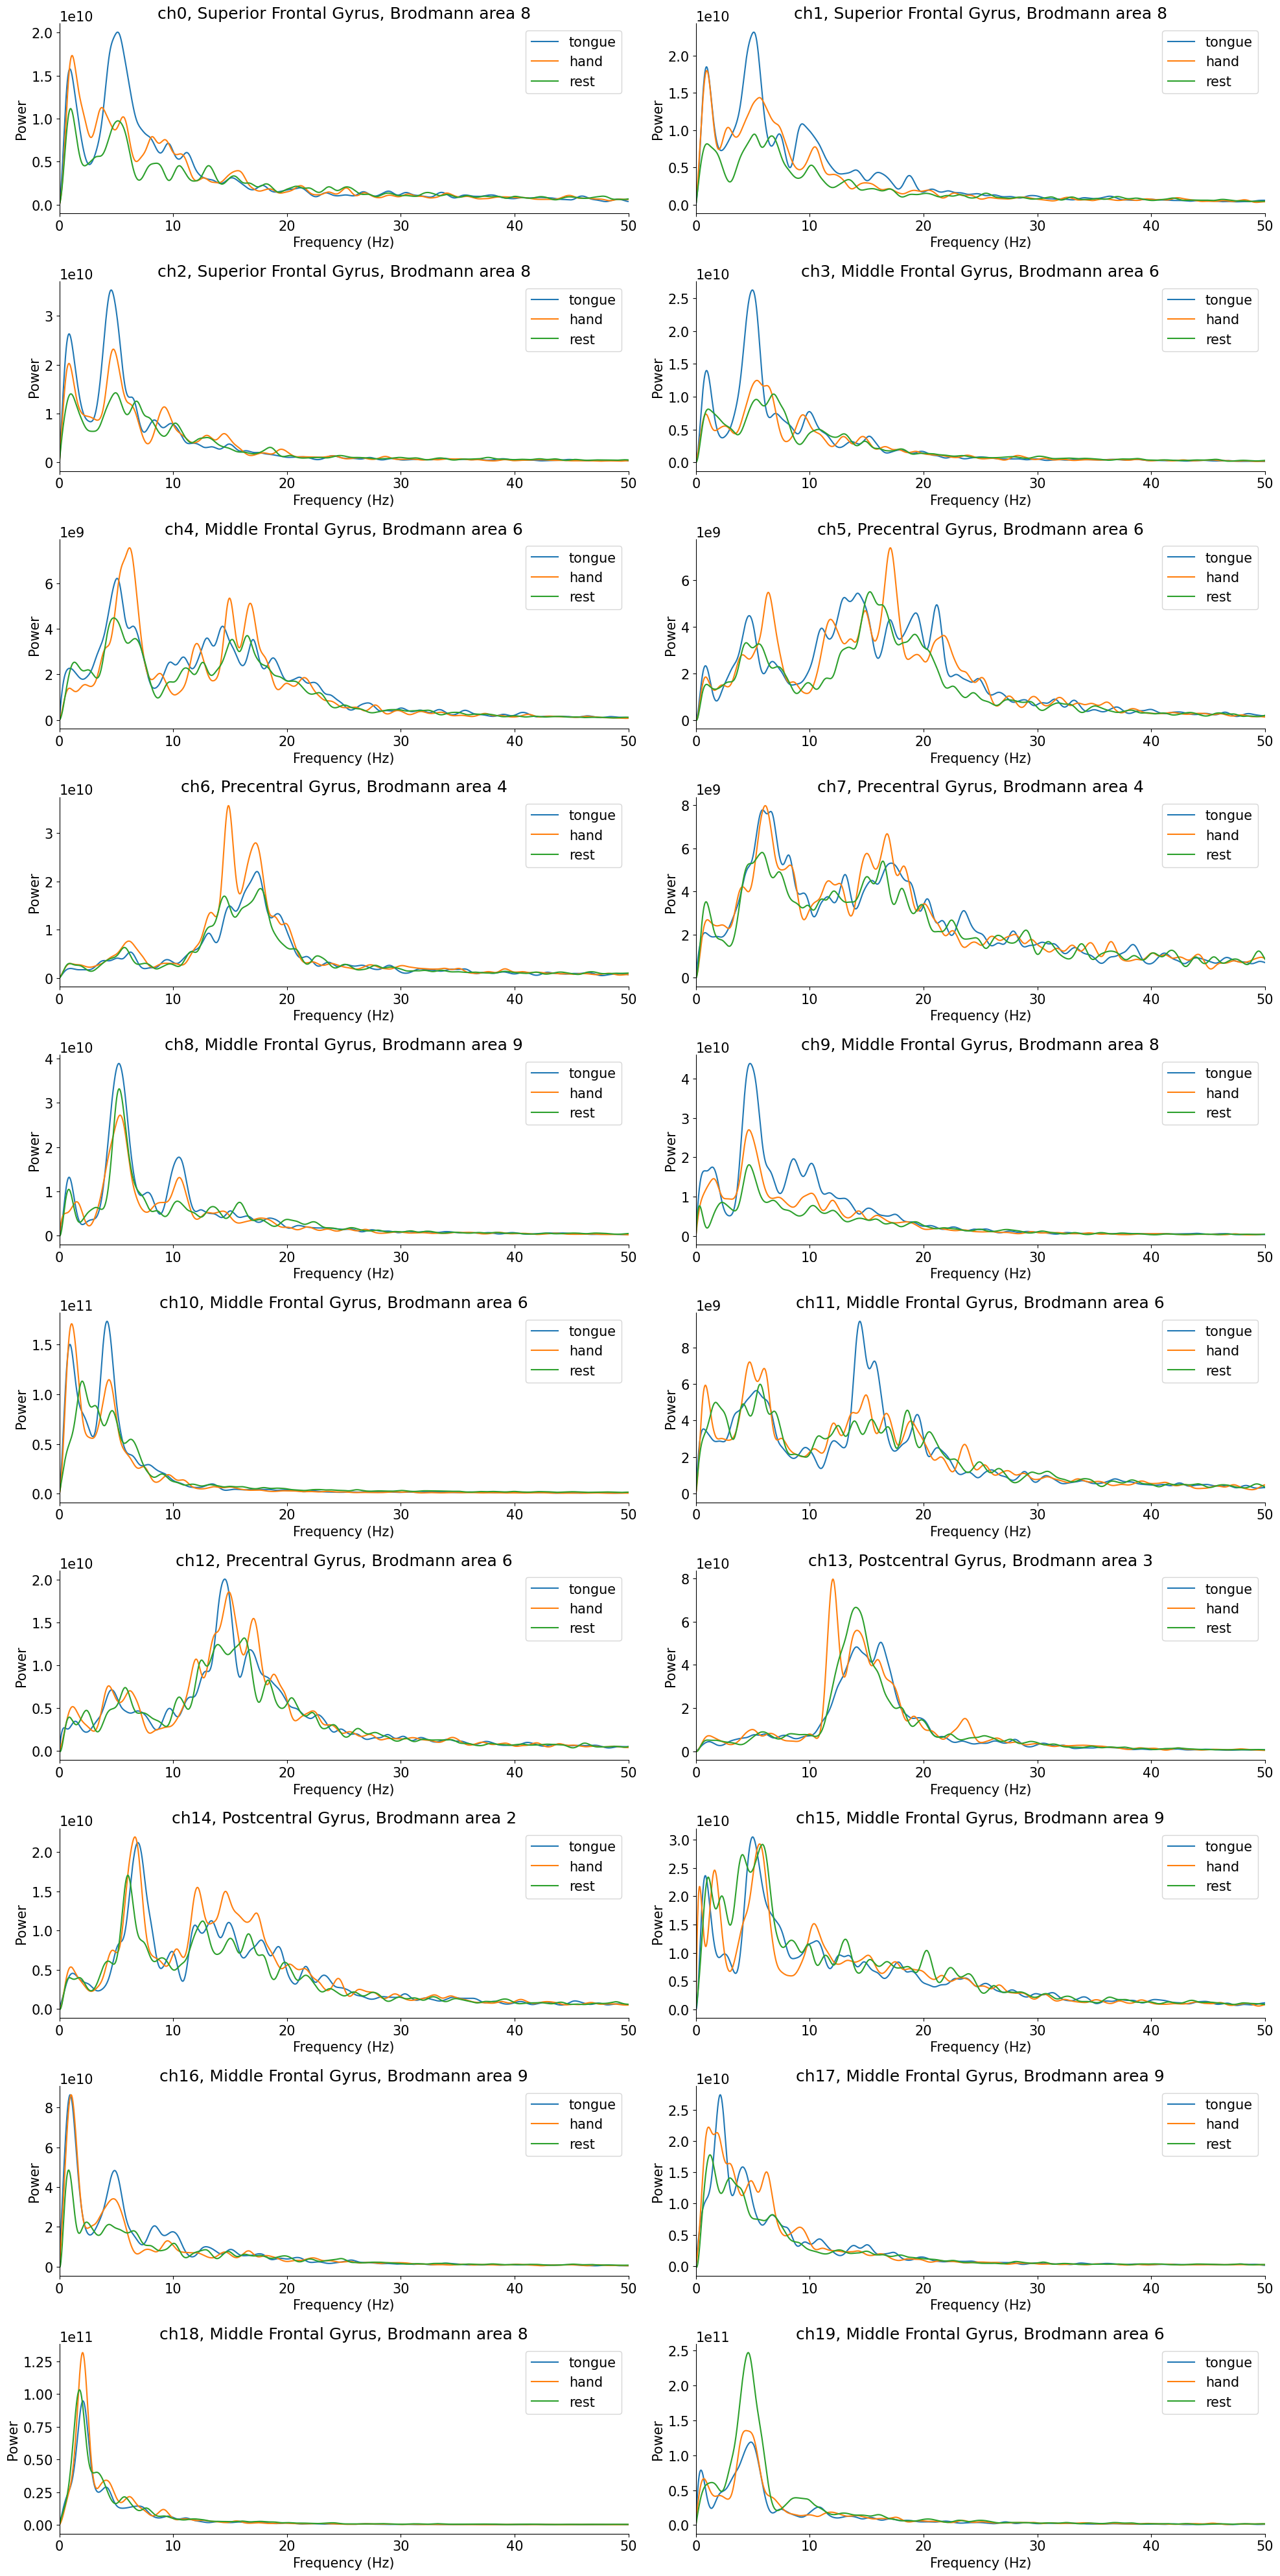

In [14]:
# Motor Imagery
V_tongue, V_hand, V_rest = split_dataset(dat2)

# Concatenate the epochs
V_tongue_concat, V_hand_concat, V_rest_concat = concatenate_epochs(V_tongue, V_hand, V_rest)

# How many trials do you want to visualize?
num_chs = 20

# Plot the PSD
plot_PSD(V_tongue_concat, V_hand_concat, V_rest_concat, num_chs)


In [18]:
dat1['gyrus']

['Superior Frontal Gyrus',
 'Superior Frontal Gyrus',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Precentral Gyrus',
 'Precentral Gyrus',
 'Precentral Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Precentral Gyrus',
 'Postcentral Gyrus',
 'Postcentral Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Precentral Gyrus',
 'Postcentral Gyrus',
 'Inferior Parietal Lobule',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus',
 'Precentral Gyrus',
 'Precentral Gyrus',
 'Postcentral Gyrus',
 'Inferior Parietal Lobule',
 'Middle Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus',
 'Inferior Frontal Gyrus',
 'Precentral Gyrus',
 'Precentral Gyrus',
 'Postcentral Gyrus',
 'Inferior Parietal Lobule',
 'Inferior Frontal Gyrus',
 'Inferior Frontal Gyrus'

In [19]:
dat1['Brodmann_Area']

['Brodmann area 8',
 'Brodmann area 8',
 'Brodmann area 8',
 'Brodmann area 6',
 'Brodmann area 6',
 'Brodmann area 6',
 'Brodmann area 4',
 'Brodmann area 4',
 'Brodmann area 9',
 'Brodmann area 8',
 'Brodmann area 6',
 'Brodmann area 6',
 'Brodmann area 6',
 'Brodmann area 3',
 'Brodmann area 2',
 'Brodmann area 9',
 'Brodmann area 9',
 'Brodmann area 9',
 'Brodmann area 8',
 'Brodmann area 6',
 'Brodmann area 4',
 'Brodmann area 3',
 'Brodmann area 40',
 'Brodmann area 46',
 'Brodmann area 46',
 'Brodmann area 9',
 'Brodmann area 9',
 'Brodmann area 6',
 'Brodmann area 6',
 'Brodmann area 3',
 'Brodmann area 40',
 'Brodmann area 46',
 'Brodmann area 46',
 'Brodmann area 45',
 'Brodmann area 44',
 'Brodmann area 6',
 'Brodmann area 4',
 'Brodmann area 2',
 'Brodmann area 40',
 'Brodmann area 45',
 'Brodmann area 45',
 'Brodmann area 44',
 'Brodmann area 6',
 'Brodmann area 43',
 'Brodmann area 40',
 'Brodmann area 42']

In [6]:
# quick way to get broadband power in time-varying windows
from scipy import signal

# pick subject 0 and experiment 0 (real movements)
dat1 = alldat[0][0]

# V is the voltage data
V = dat1['V'].astype('float32')

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

In [7]:
# average the broadband power across all tongue and hand trials
nt, nchan = V.shape
nstim = len(dat1['t_on'])

trange = np.arange(0, 2000)
ts = dat1['t_on'][:, np.newaxis] + trange

V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_tongue = (V_epochs[dat1['stim_id'] == 11]).mean(0)
V_hand = (V_epochs[dat1['stim_id'] == 12]).mean(0)

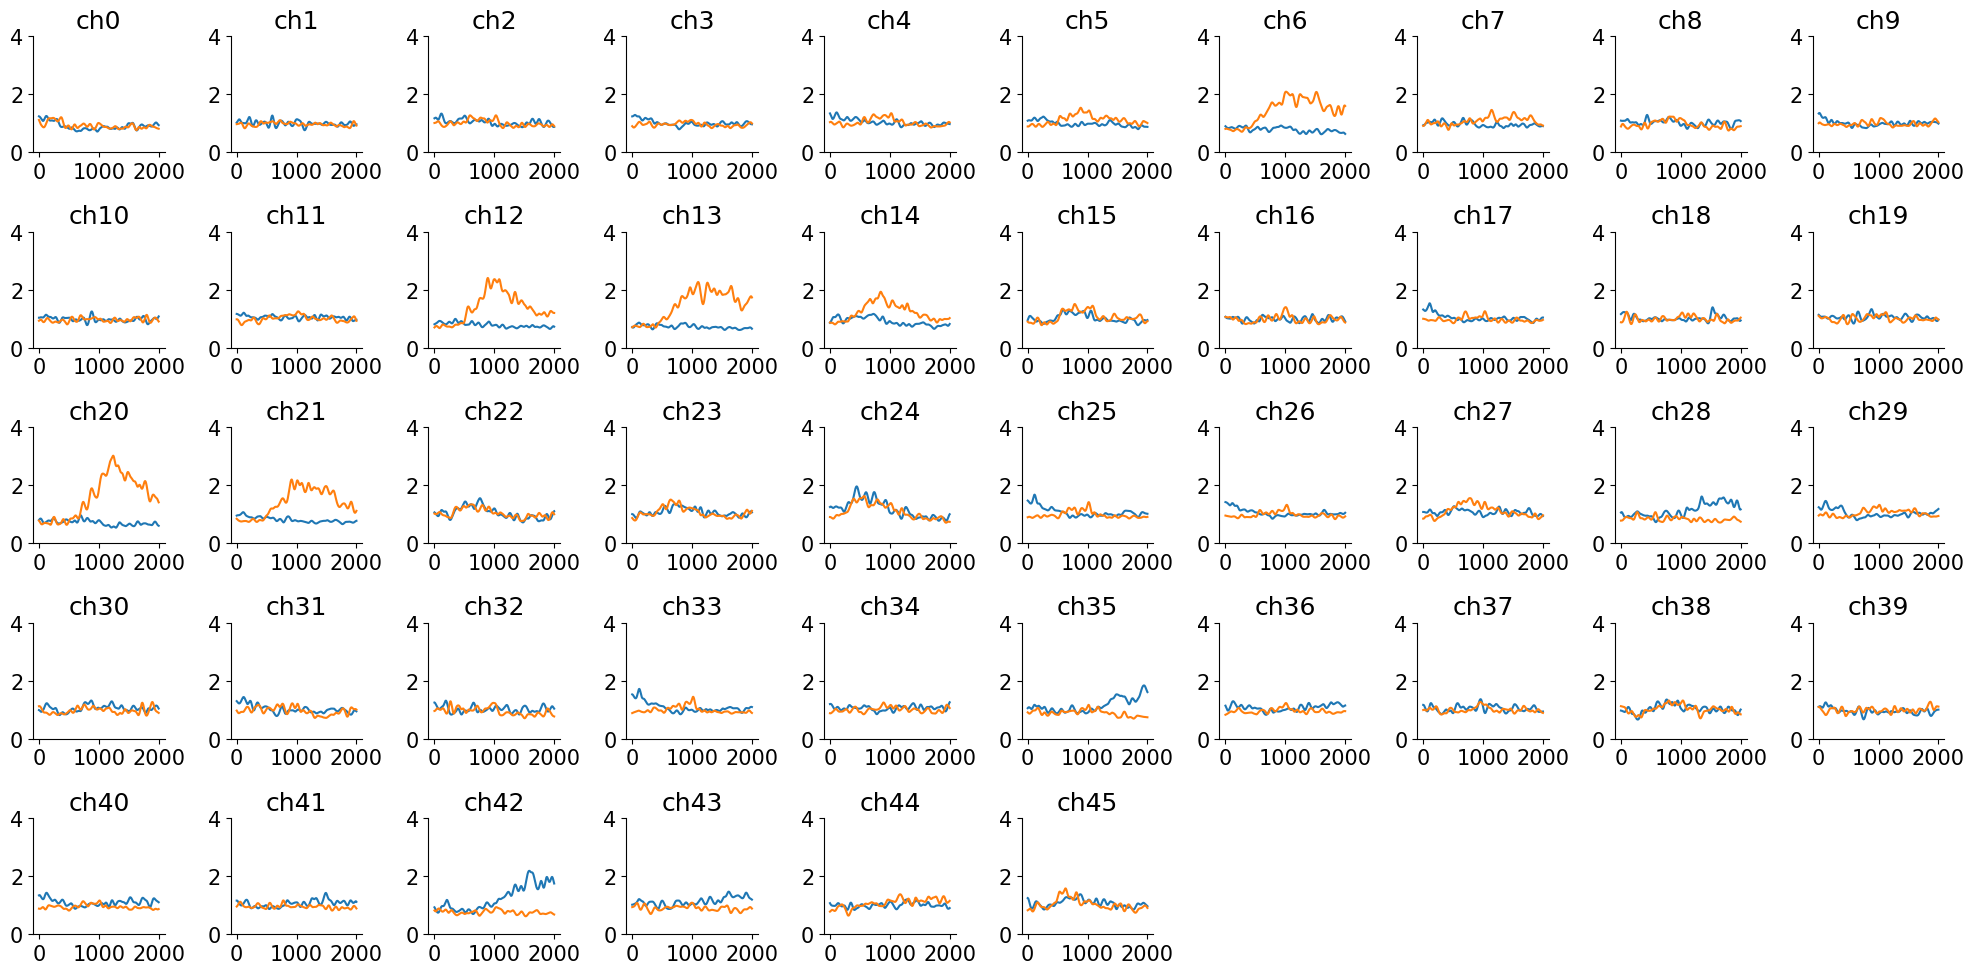

In [8]:
# let's find the electrodes that distinguish tongue from hand movements
# note the behaviors happen some time after the visual cue

plt.figure(figsize=(20, 10))
for j in range(46):
  ax = plt.subplot(5, 10, j+1)
  plt.plot(trange, V_tongue[:, j])
  plt.plot(trange, V_hand[:, j])
  plt.title('ch%d'%j)
  plt.xticks([0, 1000, 2000])
  plt.ylim([0, 4])
plt.show()

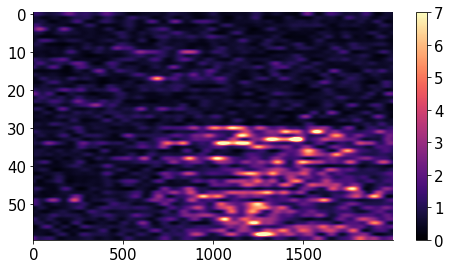

In [ ]:
# let's look at all the trials for electrode 20 that has a good response to hand movements
# we will sort trials by stimulus id
plt.subplot(1, 3, 1)
isort = np.argsort(dat1['stim_id'])
plt.imshow(V_epochs[isort, :, 20].astype('float32'),
           aspect='auto',
           vmax=7, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()

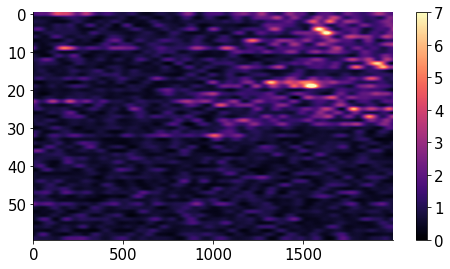

In [ ]:
# Electrode 42 seems to respond to tongue movements
isort = np.argsort(dat1['stim_id'])
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[isort, :, 42].astype('float32'),
           aspect='auto',
           vmax=7, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()